In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
%matplotlib inline

In [3]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import csv
import math
import matplotlib.pyplot as plt
from scipy.signal import hilbert, chirp
import scipy
import networkx as nx

In [4]:
c_dataset = ['Timestamp','vIDa', 'vIDb', 'dist_ab', 'v_a_Type', 'v_a_Vel', 'v_a_Lane', 'v_a_Pred', 'v_a_Foll', 'v_count', 'v_mean_vel',
         'delta_vel']

dataset = pd.read_table('D:\\zzzLola\\PhD\\DataSet\\US101\\test\\dataset.txt', sep='\t', header=None, names=c_dataset)

In [5]:
dataset['inv_dist'] = 1/dataset.dist_ab


In [6]:
dataset[:10]

,Timestamp,vIDa,vIDb,dist_ab,v_a_Type,v_a_Vel,v_a_Lane,v_a_Pred,v_a_Foll,v_count,v_mean_vel,delta_vel,inv_dist
0,1.118847e+12,1073.0,1077.0,26.760834,2.0,18.263616,2.0,0.0,1083.0,22.0,18.18894,0.074676,0.037368
1,1.118847e+12,1073.0,1080.0,9.739521,2.0,18.263616,2.0,0.0,1083.0,22.0,18.18894,0.074676,0.102674
2,1.118847e+12,1073.0,1081.0,19.198605,2.0,18.263616,2.0,0.0,1083.0,22.0,18.18894,0.074676,0.052087
3,1.118847e+12,1073.0,1082.0,20.679750,2.0,18.263616,2.0,0.0,1083.0,22.0,18.18894,0.074676,0.048356
4,1.118847e+12,1073.0,1083.0,56.396881,2.0,18.263616,2.0,0.0,1083.0,22.0,18.18894,0.074676,0.017731
5,1.118847e+12,1073.0,1084.0,40.510313,2.0,18.263616,2.0,0.0,1083.0,22.0,18.18894,0.074676,0.024685
6,1.118847e+12,1073.0,1086.0,56.592865,2.0,18.263616,2.0,0.0,1083.0,22.0,18.18894,0.074676,0.017670
7,1.118847e+12,1073.0,1087.0,19.093697,2.0,18.263616,2.0,0.0,1083.0,22.0,18.18894,0.074676,0.052373
8,1.118847e+12,1073.0,1088.0,83.171880,2.0,18.263616,2.0,0.0,1083.0,22.0,18.18894,0.074676,0.012023
9,1.118847e+12,1073.0,1089.0,15.309671,2.0,18.263616,2.0,0.0,1083.0,22.0,18.18894,0.074676,0.065318


In [7]:
#v_a = dataset.loc[dataset['vIDa'].isin([1280,1274])]

In [8]:
#v1274_1280 = v_a.loc[dataset['vIDb'].isin([1280,1274])]

In [9]:
#v1274_1280

In [7]:
datagraph = dataset[['Timestamp','vIDa', 'vIDb','v_a_Lane','dist_ab','inv_dist','delta_vel']]

In [8]:
#datagraph = v1274_1280[['Timestamp','vIDa', 'vIDb', 'dist_ab','inv_dist','delta_vel']]

In [9]:
datagraph[:20]

,Timestamp,vIDa,vIDb,v_a_Lane,dist_ab,inv_dist,delta_vel
0,1.118847e+12,1073.0,1077.0,2.0,26.760834,0.037368,0.074676
1,1.118847e+12,1073.0,1080.0,2.0,9.739521,0.102674,0.074676
2,1.118847e+12,1073.0,1081.0,2.0,19.198605,0.052087,0.074676
3,1.118847e+12,1073.0,1082.0,2.0,20.679750,0.048356,0.074676
4,1.118847e+12,1073.0,1083.0,2.0,56.396881,0.017731,0.074676
5,1.118847e+12,1073.0,1084.0,2.0,40.510313,0.024685,0.074676
6,1.118847e+12,1073.0,1086.0,2.0,56.592865,0.017670,0.074676
7,1.118847e+12,1073.0,1087.0,2.0,19.093697,0.052373,0.074676
8,1.118847e+12,1073.0,1088.0,2.0,83.171880,0.012023,0.074676
9,1.118847e+12,1073.0,1089.0,2.0,15.309671,0.065318,0.074676


In [11]:
#del dataset

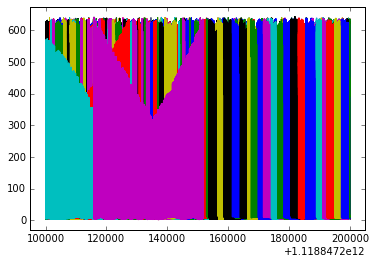

In [10]:
fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for i, group in datagraph.groupby(['vIDa']):
    ax.plot(group.Timestamp, group.dist_ab, label = str(i))
#ax.legend()

plt.show()

In [11]:
#It does not work because I am not logged in. I have an account, btw. 
#import plotly.plotly as py
#import plotly.graph_objs as go

In [12]:
#df1 = datagraph.loc[datagraph['Timestamp'].isin([1.118847e+12])]
#df2 = df1[['vIDa', 'vIDb','dist_ab']]

In [13]:
#data = [go.Heatmap( z=df2.values.tolist(), colorscale='Viridis')]

In [14]:
#py.iplot(data, filename='pandas-heatmap')

In [15]:
#Graph for speed variation between two cars. 
#fig, ax = plt.subplots()
#ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
#for i, group in datagraph.groupby(['vIDa']):
#    ax.plot(group.Timestamp, group.delta_vel, label = str(i))
#ax.legend()

#plt.show()

In [16]:
#ts = datagraph.groupby(['Timestamp'])

In [17]:
#ts.count()

In [18]:
#graphDF = pd.DataFrame()

In [19]:
#for i, group in ts:
    #print group['vIDa'] + group['vIDb']
#    G=nx.from_pandas_dataframe(group, 'vIDa', 'vIDb', ['inv_dist'], nx.DiGraph())      
    
#    type(group)
    
#    print '***** New graph ****'
    
    
#    for n in G.nodes_iter():
        #if group.vIDa[1] == n:
        #    print n
#        print 'Node: %d ' % n 
#        print group['vIDa'] 
#        G.node[n]['theta'] = 2*n
   
#    print i, G.nodes(data = True), G.edges(data = True)
    #network.node[i]['theta']
    #######print G.number_of_nodes(), G.number_of_edges()
    #print G.nodes()
    #print G.edges()
    #print G.adjacency_list()
    ########print G.edges(data=True)
    #nx.write_gpickle(G, "test.gpickle"+str(i))
    #graphDF = graphDF.append(nx.to_pandas_dataframe(G))
    #nx.write_weighted_edgelist(G,"test.edgelist-"+str(i)) #Does not store the weights
#nx.draw(G)
#nx.draw(G)
#pos = nx.spring_layout(G)
#nx.draw(G, with_labels = True, pos = pos)


#labels=nx.draw_networkx_labels(G, pos=nx.spring_layout(G))
    

In [20]:
#graphDF

In [21]:
#G.number_of_nodes()

In [22]:
#G.number_of_edges()

In [24]:
#pos = nx.spring_layout(G)
#nx.draw(G, with_labels = True, pos = pos)

In [25]:
#nx.draw_random(G)

In [26]:
#nx.draw_spectral(G)

In [27]:
#plt.show()

In [28]:
#nx.draw_circular(G)

In [29]:
#G[1073][1077]['inv_dist']

In [30]:
#G.edges(data=True)

In [31]:
#for u,v,d in G.edges(data=True):
#    print u,v,d['inv_dist']

In [32]:
#G2 = nx.read_gpickle("test.gpickle1.1188473e+12")
#pos2 = nx.spring_layout(G2)
#nx.draw(G2, with_labels = True, pos = pos2)

In [33]:
#G3 = nx.read_weighted_edgelist("test.edgelist-1.1188473e+12")
#pos3 = nx.spring_layout(G3)
#nx.draw(G3, with_labels = True, pos = pos3)

In [7]:
dataset.head(n=10)

,Timestamp,vIDa,vIDb,dist_ab,v_a_Type,v_a_Vel,v_a_Lane,v_a_Pred,v_a_Foll,v_count,v_mean_vel,delta_vel,inv_dist
0,1.118847e+12,1073.0,1077.0,26.760834,2.0,18.263616,2.0,0.0,1083.0,22.0,18.18894,0.074676,0.037368
1,1.118847e+12,1073.0,1080.0,9.739521,2.0,18.263616,2.0,0.0,1083.0,22.0,18.18894,0.074676,0.102674
2,1.118847e+12,1073.0,1081.0,19.198605,2.0,18.263616,2.0,0.0,1083.0,22.0,18.18894,0.074676,0.052087
3,1.118847e+12,1073.0,1082.0,20.679750,2.0,18.263616,2.0,0.0,1083.0,22.0,18.18894,0.074676,0.048356
4,1.118847e+12,1073.0,1083.0,56.396881,2.0,18.263616,2.0,0.0,1083.0,22.0,18.18894,0.074676,0.017731
5,1.118847e+12,1073.0,1084.0,40.510313,2.0,18.263616,2.0,0.0,1083.0,22.0,18.18894,0.074676,0.024685
6,1.118847e+12,1073.0,1086.0,56.592865,2.0,18.263616,2.0,0.0,1083.0,22.0,18.18894,0.074676,0.017670
7,1.118847e+12,1073.0,1087.0,19.093697,2.0,18.263616,2.0,0.0,1083.0,22.0,18.18894,0.074676,0.052373
8,1.118847e+12,1073.0,1088.0,83.171880,2.0,18.263616,2.0,0.0,1083.0,22.0,18.18894,0.074676,0.012023
9,1.118847e+12,1073.0,1089.0,15.309671,2.0,18.263616,2.0,0.0,1083.0,22.0,18.18894,0.074676,0.065318


In [7]:
byTime = dataset.groupby('Timestamp')

In [8]:
byTime

In [10]:
#byTime['dist_ab'].describe()

In [9]:
byTime.ngroups

1000

In [ ]:
byTime.size()

In [ ]:
byTime.count()

In [ ]:
byTime.mean()

In [13]:
def print_groups (groupobject):
    # loop over all groups, printing the group name 
    # and group details
    for name, group in groupobject:
        print (name)
        print (group)

In [ ]:
#print_groups(byTime)

1.1188473e+12
             Timestamp    vIDa    vIDb     dist_ab  v_a_Type    v_a_Vel  \
0         1.118847e+12  1073.0  1077.0   26.760834       2.0  18.263616   
1         1.118847e+12  1073.0  1080.0    9.739521       2.0  18.263616   
2         1.118847e+12  1073.0  1081.0   19.198605       2.0  18.263616   
3         1.118847e+12  1073.0  1082.0   20.679750       2.0  18.263616   
4         1.118847e+12  1073.0  1083.0   56.396881       2.0  18.263616   
5         1.118847e+12  1073.0  1084.0   40.510313       2.0  18.263616   
6         1.118847e+12  1073.0  1086.0   56.592865       2.0  18.263616   
7         1.118847e+12  1073.0  1087.0   19.093697       2.0  18.263616   
8         1.118847e+12  1073.0  1088.0   83.171880       2.0  18.263616   
9         1.118847e+12  1073.0  1089.0   15.309671       2.0  18.263616   
10        1.118847e+12  1073.0  1090.0   77.817418       2.0  18.263616   
11        1.118847e+12  1073.0  1091.0   84.186728       2.0  18.263616   
12        1

In [ ]:
byTime_lane = data.groupby(['Timestamp', 'v_a_Lane'])